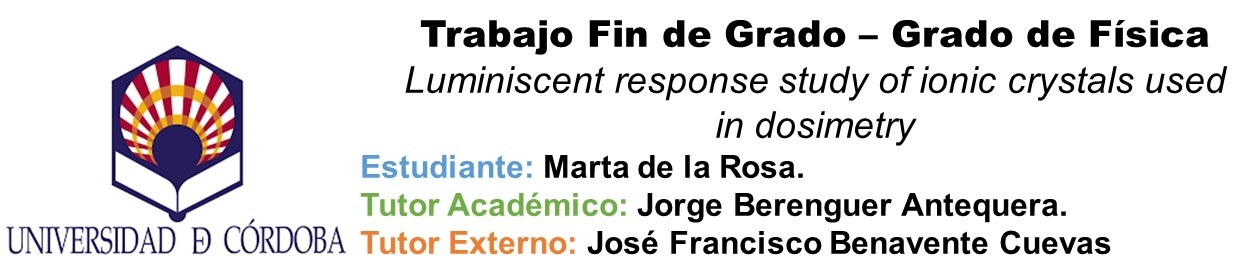

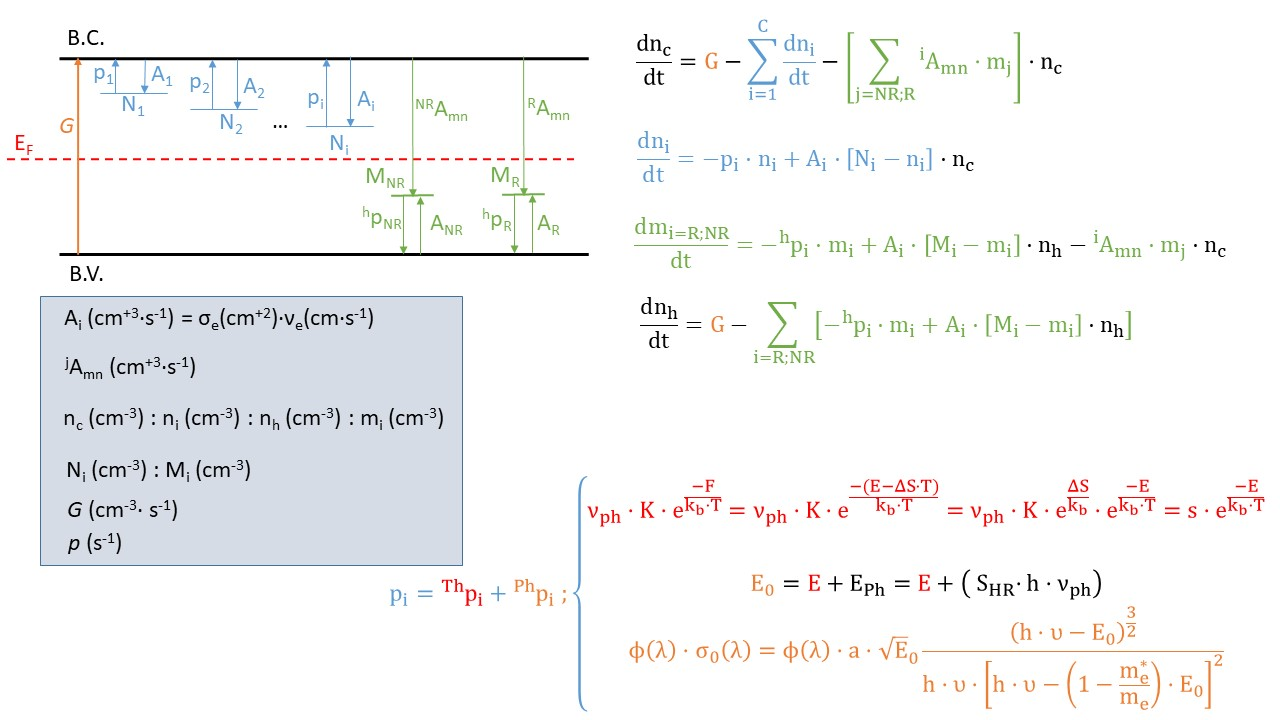

# Importar Librerías

In [1]:
import numpy as np
import pandas as pd

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import warnings

import math
from scipy.optimize import curve_fit
from prettytable import PrettyTable

import ipywidgets as widgets
from IPython.display import display, HTML
from scipy.stats import poisson

from scipy.integrate import odeint

import time


# Modelo **LiF: Mg; Ti**.

### 1. Importar Datos

Parámetros Estructurales

*Introducir Nombre del Archivo*

In [6]:
# Crear la caja de entrada de texto (Entry box) inicialmente oculta
text_box_ValorParametrosEstructurales = widgets.Text(
    value='ParametrosEstructurales.xlsx',
    placeholder='ParametrosEstructurales.xlsx',
    description='Dato:',
    disabled=False
)

button_Parametros_Estructurales = widgets.Button(
    description='Ejecutar',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' o ''
    tooltip='Haz clic para enviar',
)


def on_Parametros_Estructurales_click(b):
  global ArchivoParametrosEstructurales
  ArchivoParametrosEstructurales=text_box_ValorParametrosEstructurales.value
  print(f"Archivo Parámetros Estructurales: {ArchivoParametrosEstructurales}")
  print("Ejecuta la siguiente Celda")

# Asociar la función al evento de clic del botón
button_Parametros_Estructurales.on_click(on_Parametros_Estructurales_click)

# Mostrar los widgets en la salida
display(text_box_ValorParametrosEstructurales,button_Parametros_Estructurales)



Text(value='ParametrosEstructurales.xlsx', description='Dato:', placeholder='ParametrosEstructurales.xlsx')

Button(description='Ejecutar', style=ButtonStyle(), tooltip='Haz clic para enviar')

In [7]:
DatosEntrada=pd.read_excel(ArchivoParametrosEstructurales, sheet_name='Hoja1', header=0, usecols=None, nrows=None)

df=DatosEntrada

N_I,N_II,N_III,N_IV,N_V,N_s=df.iloc[[0],[0]].values[0][0],df.iloc[[1],[0]].values[0][0],df.iloc[[2],[0]].values[0][0],df.iloc[[3],[0]].values[0][0],df.iloc[[4],[0]].values[0][0],df.iloc[[5],[0]].values[0][0]
M_R,M_NR=df.iloc[[0],[1]].values[0][0],df.iloc[[0],[2]].values[0][0]
A_I,A_II,A_III,A_IV,A_V,A_s=df.iloc[[0],[3]].values[0][0],df.iloc[[1],[3]].values[0][0],df.iloc[[2],[3]].values[0][0],df.iloc[[3],[3]].values[0][0],df.iloc[[4],[3]].values[0][0],df.iloc[[5],[3]].values[0][0]
A_mn_NR,A_mn_R=df.iloc[[0],[4]].values[0][0],df.iloc[[0],[5]].values[0][0]
A_NR,A_R=df.iloc[[0],[6]].values[0][0],df.iloc[[0],[7]].values[0][0]

print("\nConcetración de posiones accesibles de cada una de las distribuciones:")
display(HTML(f"<span style='color: red;'>N<sub>I</sub> </span>: {N_I} (cm<sup>-3</sup>)"))
display(HTML(f"N<sub>II</sub> : {N_II} (cm<sup>-3</sup>)"))
display(HTML(f"N<sub>III</sub> : {N_III} (cm<sup>-3</sup>)"))
display(HTML(f"N<sub>IV</sub> : {N_IV} (cm<sup>-3</sup>)" ))
display(HTML(f"N<sub>V</sub> : {N_V} (cm<sup>-3</sup>)"))
display(HTML(f"N<sub>s</sub> : {N_s} (cm<sup>-3</sup>)"))

print("\nCoeficiente de probabilidad de atrapamiento de electrones libres, en las trampas:")
display(HTML(f"A<sub>I</sub> : {A_I} (cm<sup>3</sup>·s<sup>-1</sup>)"))
display(HTML(f"A<sub>II</sub> : {A_II} (cm<sup>3</sup>·s<sup>-1</sup>)"))
display(HTML(f"A<sub>III</sub> : {A_III} (cm<sup>3</sup>·s<sup>-1</sup>)"))
display(HTML(f"A<sub>IV</sub> : {A_IV} (cm<sup>3</sup>·s<sup>-1</sup>)"))
display(HTML(f"A<sub>V</sub> : {A_V} (cm<sup>3</sup>·s<sup>-1</sup>)"))
display(HTML(f"A<sub>s</sub> : {A_s} (cm<sup>3</sup>·s<sup>-1</sup>)"))

print("\nCoeficiente de probabilidad de atrapamiento de huecos libres, en los Centros de Recombinación:")
display(HTML(f"<sup>NR</sup>A<sub>h</sub> : {A_NR} (cm<sup>3</sup>·s<sup>-1</sup>)"))
display(HTML(f"<sup>R</sup>A<sub>h</sub> : {A_R} (cm<sup>3</sup>·s<sup>-1</sup>)"))

print("\nCoeficiente de probabilidad de atrapamiento de pares electrones libres huecos atrapados:")
display(HTML(f"<sup>NR</sup>A<sub>mn</sub> : {A_mn_NR} (cm<sup>3</sup>·s<sup>-1</sup>)"))
display(HTML(f"<sup>R</sup>A<sub>mn</sub> : {A_mn_R} (cm<sup>3</sup>·s<sup>-1</sup>)"))



Concetración de posiones accesibles de cada una de las distribuciones:



Coeficiente de probabilidad de atrapamiento de electrones libres, en las trampas:



Coeficiente de probabilidad de atrapamiento de huecos libres, en los Centros de Recombinación:



Coeficiente de probabilidad de atrapamiento de pares electrones libres huecos atrapados:


Parámetros Cinéticos (*Geométricos*)

*Introducir Nombre del Archivo*

In [4]:
# Crear la caja de entrada de texto (Entry box) inicialmente oculta
text_box_ValorParametrosCineticos = widgets.Text(
    value='ParametrosCineticos.xlsx',
    placeholder='ParametrosCineticos.xlsx',
    description='Dato:',
    disabled=False
)

button_Parametros_Cineticos = widgets.Button(
    description='Ejecutar',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' o ''
    tooltip='Haz clic para enviar',
)

def on_Parametros_Cineticos_click(b):
  global ArchivoParametrosCineticos
  ArchivoParametrosCineticos=text_box_ValorParametrosCineticos.value
  print(f"Archivo Parámetros Estructurales: {ArchivoParametrosEstructurales}")
  print("Ejecuta la siguiente Celda")

# Asociar la función al evento de clic del botón
button_Parametros_Cineticos.on_click(on_Parametros_Cineticos_click)

# Mostrar los widgets en la salida
display(text_box_ValorParametrosCineticos,button_Parametros_Cineticos)


Text(value='ParametrosCineticos.xlsx', description='Dato:', placeholder='ParametrosCineticos.xlsx')

Button(description='Ejecutar', style=ButtonStyle(), tooltip='Haz clic para enviar')

Archivo Parámetros Estructurales: ParametrosEstructurales.xlsx
Ejecuta la siguiente Celda


In [5]:
DatosEntrada=pd.read_excel(ArchivoParametrosCineticos, sheet_name='Hoja1', header=0, usecols=None, nrows=None)

df_=DatosEntrada

E_I,E_II,E_III,E_IV,E_V,E_s=df_.iloc[[0],[0]].values[0][0],df_.iloc[[1],[0]].values[0][0],df_.iloc[[2],[0]].values[0][0],df_.iloc[[3],[0]].values[0][0],df_.iloc[[4],[0]].values[0][0],df_.iloc[[5],[0]].values[0][0]
S_I,S_II,S_III,S_IV,S_V,S_s=df_.iloc[[0],[1]].values[0][0],df_.iloc[[1],[1]].values[0][0],df_.iloc[[2],[1]].values[0][0],df_.iloc[[3],[1]].values[0][0],df_.iloc[[4],[1]].values[0][0],df_.iloc[[5],[1]].values[0][0]

E_R_h,S_R_h=df_.iloc[[0],[2]].values[0][0],df_.iloc[[0],[3]].values[0][0]
E_NR_h,S_NR_h=df_.iloc[[0],[4]].values[0][0],df_.iloc[[0],[5]].values[0][0]

print("\nValores de la Energia de Activación de las trampas de electrones:")
display(HTML(f"<span style='color: red;'>E<sub>I</sub> </span>: {E_I} (eV)"))
display(HTML(f"E<sub>II</sub> : {E_II} (eV)"))
display(HTML(f"E<sub>III</sub> : {E_III} (eV)"))
display(HTML(f"E<sub>IV</sub> : {E_IV} (eV)" ))
display(HTML(f"E<sub>V</sub> : {E_V} (eV)"))
display(HTML(f"E<sub>s</sub> : {E_s} (eV)"))

print("\nValores de la Energia de Activación de los Centro de Recombinación:")
display(HTML(f"E<sub><sup>R</sup></sub> : {E_R_h} (eV)"))
display(HTML(f"E<sub><sup>NR</sup></sub> : {E_NR_h} (eV)"))


print("\nValores del Factor de Frecuencia:")
display(HTML(f"<span style='color: red;'>S<sub>I</sub> </span>: {S_I} (s<sup>-1</sup>)"))
display(HTML(f"S<sub>II</sub> : {S_II} (s<sup>-1</sup>)"))
display(HTML(f"S<sub>III</sub> : {S_III} (s<sup>-1</sup>)"))
display(HTML(f"S<sub>IV</sub> : {S_IV} (s<sup>-1</sup>)" ))
display(HTML(f"S<sub>V</sub> : {S_V} (s<sup>-1</sup>)"))
display(HTML(f"S<sub>s</sub> : {S_s} (s<sup>-1</sup>)"))

print("\nValores del Factor de Frecuencia de los Centros de Recombinación:")
display(HTML(f"S<sub><sup>R</sup></sub> : {S_R_h} (s<sup>-1</sup>)"))
display(HTML(f"S<sub><sup>NR</sup></sub> : {S_NR_h} (s<sup>-1</sup>)"))



Valores de la Energia de Activación de las trampas de electrones:



Valores de la Energia de Activación de los Centro de Recombinación:



Valores del Factor de Frecuencia:



Valores del Factor de Frecuencia de los Centros de Recombinación:


## 2. Estudio del Factor de generación de pares Electrones-Huecos

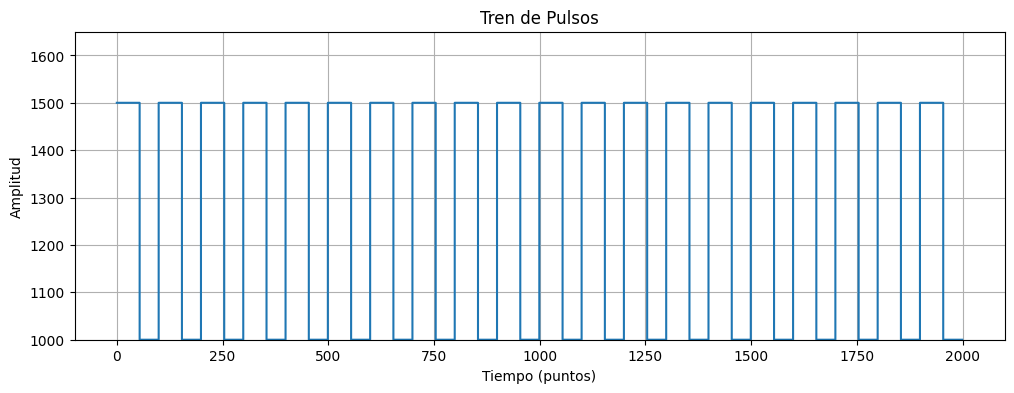

In [6]:
f=1000

def generar_tren_de_pulsos_vector(duracion_pulso, frecuencia, num_pulsos, resolucion=1000):
    """
    Genera un tren de pulsos y lo representa en un vector.

    Args:
        duracion_pulso (float): Duración del pulso en segundos.
        frecuencia (float): Frecuencia del tren de pulsos en Hz.
        num_pulsos (int): Número total de pulsos.
        resolucion (int): Número de puntos por segundo para la representación.

    Returns:
        np.array: Vector que representa el tren de pulsos.
    """
    # Calcula el período total de cada ciclo
    periodo = 1 / frecuencia
    tiempo_alto = int(duracion_pulso * resolucion)      # Duración del pulso alto en puntos
    tiempo_bajo = int((periodo - duracion_pulso) * resolucion)  # Duración del pulso bajo en puntos

    # Genera un ciclo de pulso [1,...,1, 0,...,0]
    ciclo_pulso = [1] * tiempo_alto + [0] * tiempo_bajo

    # Replicamos el ciclo para generar todos los pulsos
    tren_de_pulsos = ciclo_pulso * num_pulsos

    return np.array(tren_de_pulsos)

# Parámetros del tren de pulsos
duracion_pulso = 0.055  # Duración en segundos
frecuencia = 10        # Frecuencia en Hz
num_pulsos = 20        # Número de pulsos

# Generar el vector del tren de pulsos
tren_de_pulsos = f+(f/2)*generar_tren_de_pulsos_vector(duracion_pulso, frecuencia, num_pulsos)

# Visualizar el tren de pulsos
plt.figure(figsize=(12, 4))
plt.plot(tren_de_pulsos, drawstyle='steps-pre')
plt.title("Tren de Pulsos")
plt.xlabel("Tiempo (puntos)")
plt.ylabel("Amplitud")
plt.ylim(f, int(f+(f/2)+(f+(f/2))*0.1))
plt.grid()
plt.show()

# Intensity of the pulse
intensidad = np.mean(tren_de_pulsos)


## 3. Sistema de Ecuaciones Diferenciales

<font color="red">Novedad en el Scrit:</font><br>
<font color="red">$S_i=[S^{0}_i]^{f(T)}$</font><br>
<font color="red">$f(T)=1+α×T$</font>

<font color="blue">Que es lo que yo creo que debe ocurrir, es que a tenor de la definicion de McKeever del factor de frecuencia (s en $s^{-1}$) es un valor asociado a todo material, por tanto la ecuacion 1 es general, es decir, $S=[S^{0}]^{g(T)}$

Esta funcion g(T) es ahora mismo una incognita pero tiene que hacer que:</font><br>

<font color="blue">$S(T=T^{Max}_{i=I})=S_{I}$</font><br>

<font color="blue">$S(T=T^{Max}_{i=II})=S_{II}$</font><br>

<font color="blue">$S(T=T^{Max}_{i=III})=S_{III}$</font><br>

<font color="blue">$S(T=T^{Max}_{i=IV})=S_{IV}$</font><br>

<font color="blue">$S(T=T^{Max}_{i=V})=S_{V}$</font><br>

<font color="blue">$S(T=T^{Max}_{i=s})=S_{s}$</font><br>

<font color="green">La Justificacion teorica de estas matematicas, serian lo que hemos estado analizando con la fisica estadistica.</font>


In [7]:
# Constante de Boltzman (eV·k-1)
kB = 8.617e-5

def deriv(y, t):
  n_I,n_II,n_III,n_IV,n_V, n_s, m_R,m_NR,n_c,n_v= y
  crecimiento=1E-6
  # Definición de la probabilidad de liberación segun la Ley de Arrhenius
  p_I =(S_I**(1+crecimiento*(T + hr * t)))*np.exp(-E_I / (kB * (273.15+ T + hr * t)))
  p_II =(S_II**(1+crecimiento*(T + hr * t)))*np.exp(-E_II / (kB * (273.15+ T + hr * t)))
  p_III = (S_III**(1+crecimiento*(T + hr * t)))*np.exp(-E_III / (kB * (273.15+ T + hr * t)))
  p_IV = (S_IV**(1+crecimiento*(T + hr * t)))*np.exp(-E_IV / (kB * (273.15+ T + hr * t)))
  p_V = (S_V**(1+crecimiento*(T + hr * t)))*np.exp(-E_V / (kB * (273.15+ T + hr * t)))
  p_s= (S_s**(1+crecimiento*(T + hr * t)))*np.exp(-E_s / (kB * (273.15+ T + hr * t)))
  p_R_h = S_R_h*np.exp(-E_R_h / (kB * (273.15+ T + hr * t)))
  p_NR_h = S_NR_h*np.exp(-E_NR_h / (kB * (273.15+ T + hr * t)))


  dm_Rdt = -m_R * A_mn_R * n_c + A_R * (M_R-m_R) * n_v - p_R_h*m_R
  dm_NRdt = -m_NR * A_mn_NR* n_c+ A_NR * (M_NR-m_NR) * n_v - p_NR_h*m_NR

  dn_Idt = -n_I  * p_I + n_c* A_I * (N_I - n_I)
  dn_IIdt = -n_II  * p_II + n_c* A_II * (N_II - n_II)
  dn_IIIdt = -n_III  * p_III + n_c* A_III * (N_III - n_III)
  dn_IVdt = -n_IV  * p_IV + n_c* A_IV * (N_IV - n_IV)
  dn_Vdt = -n_V  * p_V + n_c* A_V * (N_V - n_V)
  dn_sdt = -n_s  * p_s + n_c* A_s * (N_s - n_s)

  dn_cdt=+f-(dn_Idt+dn_IIdt+dn_IIIdt+dn_IVdt+dn_Vdt+dn_sdt)-(m_R * A_mn_R +m_NR * A_mn_NR )* n_c
  dn_vdt=+f+p_R_h*m_R+p_NR_h*m_NR-(A_R*(M_R-m_R)+A_R*(M_NR-m_NR))* n_v

  return dn_Idt,dn_IIdt,dn_IIIdt,dn_IVdt,dn_Vdt,dn_sdt,dm_Rdt,dm_NRdt,dn_cdt,dn_vdt


### 3.1 Irradiación

In [8]:
# Velocidad de Calentamiento (k·s-1)
hr=0
T=25
f=1000

# Valores iniciales
n_I_0,n_II_0,n_III_0,n_IV_0,n_V_0,n_s_0, m_NR_0,m_R_0,n_c_0,n_v_0=0,0,0,0,0,0,0,0,0,0

# Vector de condiciones iniciales.
y0 = [n_I_0,n_II_0,n_III_0,n_IV_0,n_V_0,n_s_0, m_NR_0,m_R_0,n_c_0,n_v_0]


# Genera el vector t utilizando un bucle for.
num_puntos = 3600
intervalo_tiempo = 1
t = np.zeros(num_puntos)
for i in range(num_puntos):
  t[i] = i * intervalo_tiempo

ret = odeint(deriv, y0, t)

n_I,n_II,n_III,n_IV,n_V,n_s,m_R,m_NR,n_c, n_v= ret.T

<ipython-input-9-64e25c089366>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = plt.legend(loc='upper left')
<ipython-input-9-64e25c089366>:42: RuntimeWarning: invalid value encountered in divide
  plt.plot(t, (n_c+n_I+n_II+n_III+n_IV+n_V+n_s)/(m_NR + m_R +0.0), 'r', linewidth=2, )


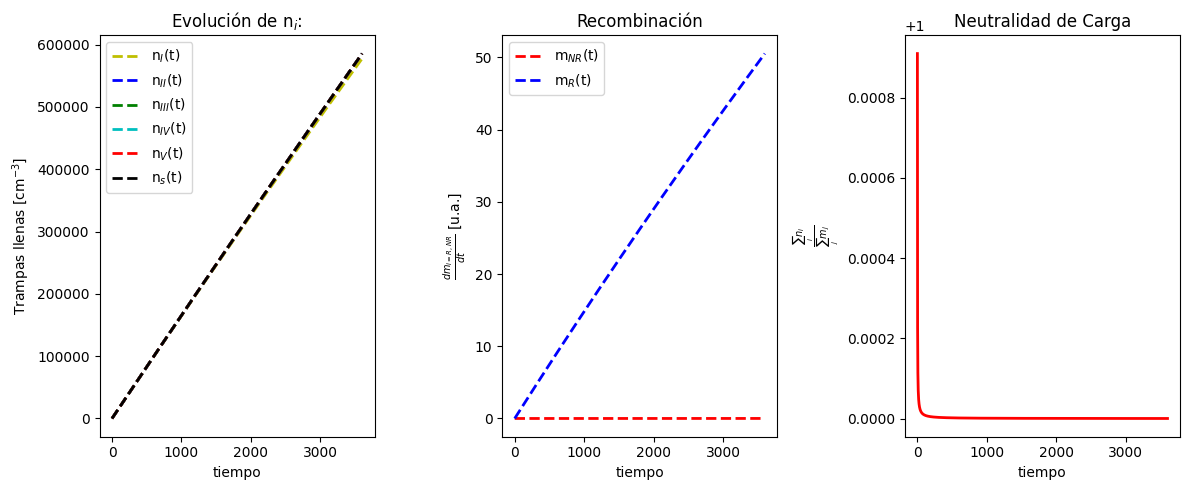

In [9]:
# Grafica los datos para cada valor de energía
plt.figure(figsize=(12, 5))

# Grafica los datos
plt.subplot(1, 3, 1)
leg = plt.legend(loc='upper left')

plt.plot(t, n_I, 'y--', linewidth=2, label='n$_{I}$(t)')
plt.plot(t, n_II, 'b--', linewidth=2, label='n$_{II}$(t)')
plt.plot(t, n_III, 'g--', linewidth=2, label='n$_{III}$(t)')
plt.plot(t, n_IV, 'c--', linewidth=2, label='n$_{IV}$(t)')
plt.plot(t, n_V, 'r--', linewidth=2, label='n$_{V}$(t)')
plt.plot(t, n_s, 'k--', linewidth=2, label='n$_{s}$(t)')

plt.plot()

leg.get_frame().set_linewidth(0.0)
plt.ylabel('Trampas llenas [cm$^{-3}$]')
leg = plt.legend(loc='upper left')
#plt.ylim(0, 2.5e5)
#plt.xlim(0, 1000)
plt.title('Evolución de n$_{i}$:')
plt.xlabel(r'tiempo')

plt.subplot(1, 3, 2)

dm_NRdt = m_NR * A_mn_NR * n_c
plt.plot(t, dm_NRdt, 'r--', linewidth=2, label='m$_{NR}$(t)')

dm_Rdt = m_R * A_mn_R * n_c
plt.plot(t, dm_Rdt, 'b--', linewidth=2, label='m$_R$(t)')

plt.ylabel(r'$\frac{dm_{i=R,NR}}{dt}$ [u.a.]')
plt.xlabel(r'tiempo')
leg = plt.legend(loc='upper left')
# plt.ylim(0, 20)
# plt.xlim(0, 100)
plt.title('Recombinación')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(t, (n_c+n_I+n_II+n_III+n_IV+n_V+n_s)/(m_NR + m_R +0.0), 'r', linewidth=2, )
plt.ylabel(r'$\frac{\sum_i n_i}{\sum_j m_j}$')
plt.xlabel(r'tiempo')
plt.title('Neutralidad de Carga')
plt.tight_layout()

# Muestra las gráficas
plt.show()



In [10]:
datos = {'nc':n_c,
         'n_I':n_I,
         'n_II':n_II,
         'n_III':n_III,
         'n_IV':n_IV,
         'n_V':n_V,
         'n_s':n_s,
         'm_R':m_R,
         'm_NR':m_NR,
         'n_v':n_v,
         }

# Crear un DataFrame con pandas
df = pd.DataFrame(datos)

from IPython.display import display
# Mostrar el DataFrame utilizando display
display(df)

,nc,n_I,n_II,n_III,n_IV,n_V,n_s,m_R,m_NR,n_v
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,1.666644,166.387102,166.387738,166.387738,166.387738,166.387738,166.387738,9.082569e+02,90.826446,0.909091
2,1.666621,333.048392,333.050942,333.050942,333.050942,333.050942,333.050942,1.817325e+03,181.735534,0.909091
3,1.666597,499.706092,499.711833,499.711833,499.711833,499.711833,499.711833,2.726378e+03,272.644621,0.909091
4,1.666574,666.360204,666.370412,666.370413,666.370413,666.370413,666.370413,3.635416e+03,363.553707,0.909091
...,...,...,...,...,...,...,...,...,...,...
3595,1.589980,576953.572720,585000.255274,585000.958057,585000.958435,585000.958440,585000.958440,3.175150e+06,326808.521459,0.909120
3596,1.589961,577108.138452,585159.242628,585159.945800,585159.946178,585159.946183,585159.946183,3.176008e+06,326899.425276,0.909120
3597,1.589941,577262.701026,585318.228010,585318.931569,585318.931948,585318.931953,585318.931953,3.176867e+06,326990.329092,0.909120
3598,1.589921,577417.260441,585477.211417,585477.915365,585477.915743,585477.915748,585477.915748,3.177726e+06,327081.232907,0.909120


In [ ]:
# Exportar el DataFrame a un archivo Excel
nombre_archivo = 'Irradiacion.xlsx'
df.to_excel(nombre_archivo, index=False)

from google.colab import files
files.download(nombre_archivo)

### 3.2 Relajación

In [11]:
# Generacion de pares electrones-huecos (cm-3·s-1)
f=0

# Velocidad de Calentamiento (k·s-1)
hr=0
T=25

# Valores iniciales
n_I_0,n_II_0,n_III_0,n_IV_0,n_V_0,n_s_0, m_NR_0,m_R_0,n_c_0,n_v_0=n_I[-1],n_II[-1],n_III[-1],n_IV[-1],n_V[-1],n_s[-1],m_R[-1],m_NR[-1],n_c[-1], n_v[-1]

# Vector de condiciones iniciales.
y0 = [n_I_0,n_II_0,n_III_0,n_IV_0,n_V_0,n_s_0, m_NR_0,m_R_0,n_c_0,n_v_0]

# Genera el vector t utilizando un bucle for.
num_puntos = 3600*24*7
intervalo_tiempo = 1  # 1 segundo
t = np.zeros(num_puntos)
for i in range(num_puntos):
  t[i] = i * intervalo_tiempo

ret = odeint(deriv, y0, t)

n_I,n_II,n_III,n_IV,n_V,n_s,m_R,m_NR ,n_c, n_v= ret.T

<ipython-input-12-f93e009000e1>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = plt.legend(loc='upper left')


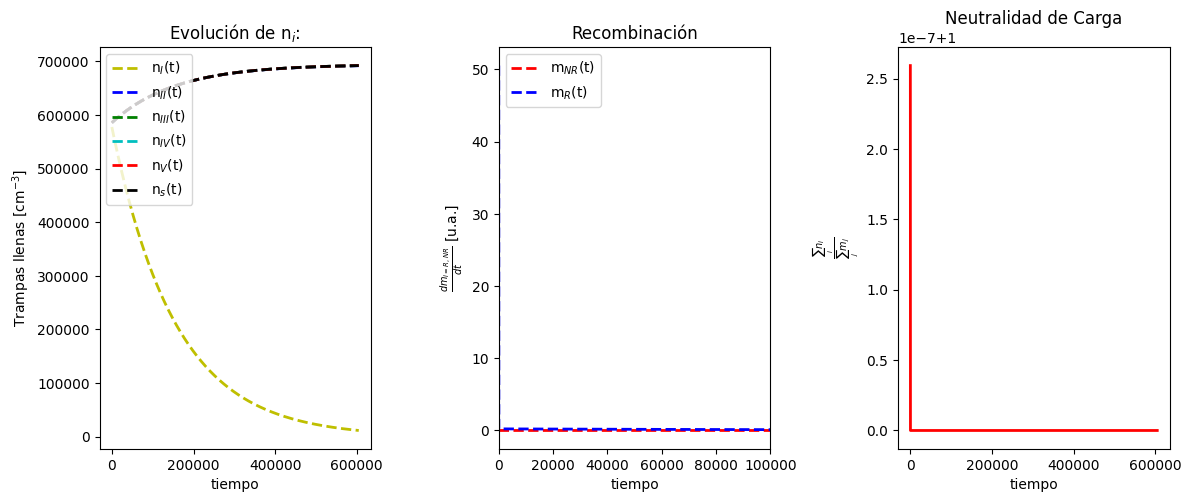

In [12]:
# Grafica los datos para cada valor de energía
plt.figure(figsize=(12, 5))

# Grafica los datos
plt.subplot(1, 3, 1)
leg = plt.legend(loc='upper left')

plt.plot(t, n_I, 'y--', linewidth=2, label='n$_{I}$(t)')
plt.plot(t, n_II, 'b--', linewidth=2, label='n$_{II}$(t)')
plt.plot(t, n_III, 'g--', linewidth=2, label='n$_{III}$(t)')
plt.plot(t, n_IV, 'c--', linewidth=2, label='n$_{IV}$(t)')
plt.plot(t, n_V, 'r--', linewidth=2, label='n$_{V}$(t)')
plt.plot(t, n_s, 'k--', linewidth=2, label='n$_{s}$(t)')

plt.plot()

leg.get_frame().set_linewidth(0.0)
plt.ylabel('Trampas llenas [cm$^{-3}$]')
leg = plt.legend(loc='upper left')
#plt.ylim(0, 2.5e5)
#plt.xlim(0, 1000)
plt.title('Evolución de n$_{i}$:')
plt.xlabel(r'tiempo')

plt.subplot(1, 3, 2)

dm_NRdt = m_NR * A_mn_NR * n_c
plt.plot(t, dm_NRdt, 'r--', linewidth=2, label='m$_{NR}$(t)')

dm_Rdt = m_R * A_mn_R * n_c
plt.plot(t, dm_Rdt, 'b--', linewidth=2, label='m$_R$(t)')

plt.ylabel(r'$\frac{dm_{i=R,NR}}{dt}$ [u.a.]')
plt.xlabel(r'tiempo')
leg = plt.legend(loc='upper left')
# plt.ylim(0, 20)
plt.xlim(0, 100000)
plt.title('Recombinación')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(t, (n_c+n_I+n_II+n_III+n_IV+n_V+n_s)/(m_NR + m_R +0.0), 'r', linewidth=2, )
plt.ylabel(r'$\frac{\sum_i n_i}{\sum_j m_j}$')
plt.xlabel(r'tiempo')
plt.title('Neutralidad de Carga')
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [ ]:
datos = {'nc':n_c,
         'n_I':n_I,
         'n_II':n_II,
         'n_III':n_III,
         'n_IV':n_IV,
         'n_V':n_V,
         'n_s':n_s,
         'm_R':m_R,
         'm_NR':m_NR,
         'n_v':n_v,
         }

# Crear un DataFrame con pandas
df = pd.DataFrame(datos)

from IPython.display import display
# Mostrar el DataFrame utilizando display
display(df)

,nc,n_I,n_II,n_III,n_IV,n_V,n_s,m_R,m_NR,n_v
0,1.589901,577571.816699,585636.192851,585636.897187,585636.897566,585636.897571,585636.897571,3.178584e+06,327172.136720,9.091199e-01
1,0.007007,577568.341626,585637.143655,585637.848379,585637.848758,585637.848763,585637.848763,3.178585e+06,327172.219336,3.743121e-20
2,0.007007,577564.616124,585637.843897,585638.549010,585638.549389,585638.549394,585638.549394,3.178584e+06,327172.219313,4.203479e-20
3,0.007007,577560.890640,585638.544135,585639.249637,585639.250016,585639.250021,585639.250021,3.178584e+06,327172.219290,4.204048e-20
4,0.007007,577557.165156,585639.244374,585639.950264,585639.950644,585639.950649,585639.950649,3.178584e+06,327172.219267,4.204616e-20
...,...,...,...,...,...,...,...,...,...,...
604795,0.000143,11690.811812,691863.395607,692131.561604,692131.705902,692131.707806,692131.707807,3.144912e+06,327168.734948,4.165430e-20
604796,0.000143,11690.736480,691863.409408,692131.575865,692131.720163,692131.722067,692131.722068,3.144912e+06,327168.734948,4.165430e-20
604797,0.000143,11690.661149,691863.423210,692131.590126,692131.734424,692131.736328,692131.736329,3.144912e+06,327168.734947,4.165430e-20
604798,0.000143,11690.585818,691863.437012,692131.604386,692131.748685,692131.750589,692131.750590,3.144912e+06,327168.734947,4.165430e-20


In [ ]:
# Exportar el DataFrame a un archivo Excel
nombre_archivo = 'Relajacion.xlsx'
df.to_excel(nombre_archivo, index=False)

from google.colab import files
files.download(nombre_archivo)

### 3.3 Calentamiento

In [13]:
# Velocidad de Calentamiento (k·s-1)
hr=1.0
T=0.0

# Valores iniciales
n_I_0,n_II_0,n_III_0,n_IV_0,n_V_0,n_s_0, m_NR_0,m_R_0,n_c_0,n_v_0=n_I[1],n_II[1],n_III[1],n_IV[1],n_V[1],n_s[1],m_R[1],m_NR[1],n_c[1], n_v[1] #n_0[0],n_I[0],n_II[0],n_III[0],n_IV[0],n_V[0],n_s[0],m_R[0],m_NR[0] ,n_c[0],n_c_[0], n_v[0],m_k[0]

# Vector de condiciones iniciales.
y0 = [n_I_0,n_II_0,n_III_0,n_IV_0,n_V_0,n_s_0, m_NR_0,m_R_0,n_c_0,n_v_0]

# Genera el vector t utilizando un bucle for.
num_puntos = 400
intervalo_tiempo = num_puntos/400  # 1 segundo42.8
t = np.zeros(num_puntos)

for i in range(num_puntos):
  t[i] = i * intervalo_tiempo

Temperatura=t*hr

ret = odeint(deriv, y0, t)

n_I,n_II,n_III,n_IV,n_V,n_s,m_R,m_NR ,n_c,n_v= ret.T

<ipython-input-14-d5954601a4d7>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = plt.legend(loc='upper left')


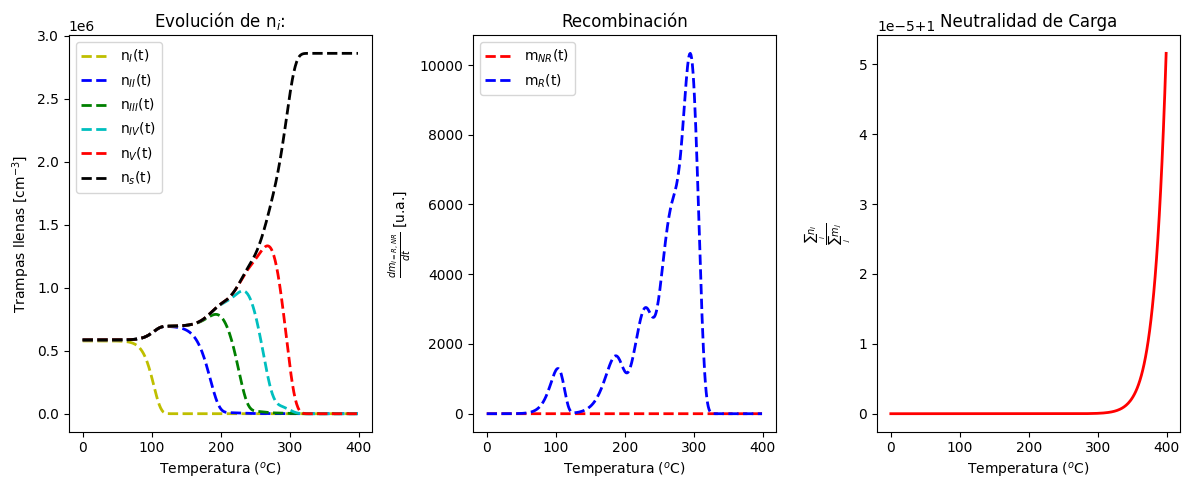

In [14]:
# Grafica los datos para cada valor de energía
plt.figure(figsize=(12, 5))

# Grafica los datos
plt.subplot(1, 3, 1)
leg = plt.legend(loc='upper left')

plt.plot(Temperatura, n_I, 'y--', linewidth=2, label='n$_{I}$(t)')
plt.plot(Temperatura, n_II, 'b--', linewidth=2, label='n$_{II}$(t)')
plt.plot(Temperatura, n_III, 'g--', linewidth=2, label='n$_{III}$(t)')
plt.plot(Temperatura, n_IV, 'c--', linewidth=2, label='n$_{IV}$(t)')
plt.plot(Temperatura, n_V, 'r--', linewidth=2, label='n$_{V}$(t)')
plt.plot(Temperatura, n_s, 'k--', linewidth=2, label='n$_{s}$(t)')

plt.plot()

leg.get_frame().set_linewidth(0.0)
plt.ylabel('Trampas llenas [cm$^{-3}$]')
leg = plt.legend(loc='upper left')
#plt.ylim(0, 2.5e5)
#plt.xlim(0, 1000)
plt.title('Evolución de n$_{i}$:')
plt.xlabel(r'Temperatura ($^{o}$C)')

plt.subplot(1, 3, 2)

dm_NRdt = m_NR * A_mn_NR * n_c
plt.plot(Temperatura, dm_NRdt, 'r--', linewidth=2, label='m$_{NR}$(t)')

dm_Rdt = m_R * A_mn_R * n_c
plt.plot(Temperatura, dm_Rdt, 'b--', linewidth=2, label='m$_R$(t)')

plt.ylabel(r'$\frac{dm_{i=R,NR}}{dt}$ [u.a.]')
plt.xlabel(r'Temperatura ($^{o}$C)')
leg = plt.legend(loc='upper left')
# plt.ylim(0, 20)
# plt.xlim(0, 100)
plt.title('Recombinación')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(t, (n_c+n_I+n_II+n_III+n_IV+n_V+n_s)/(m_NR + m_R ), 'r', linewidth=2, )
plt.ylabel(r'$\frac{\sum_i n_i}{\sum_j m_j}$')
plt.xlabel(r'Temperatura ($^{o}$C)')
plt.title('Neutralidad de Carga')
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [ ]:
datos = {'nc':n_c,
         'n_I':n_I,
         'n_II':n_II,
         'n_III':n_III,
         'n_IV':n_IV,
         'n_V':n_V,
         'n_s':n_s,
         'm_R':m_R,
         'm_NR':m_NR,
         'n_v':n_v,
         }

# Crear un DataFrame con pandas
df = pd.DataFrame(datos)

from IPython.display import display
# Mostrar el DataFrame utilizando display
display(df)

In [ ]:
# Exportar el DataFrame a un archivo Excel
nombre_archivo = 'Calentamiento.xlsx'
df.to_excel(nombre_archivo, index=False)

from google.colab import files
files.download(nombre_archivo)

# Estimación del Valor de N(E):

**Modelo de electrones Libres**

$H·ϕ=ϵ_n·ϕ$

En el modelo de electrones libres el Hamiltoniano se escribe como:

$H=\frac{\hat{p}^2}{2m}$

En una ssiendo el operador $\hat{p}=-iħ\frac{d}{dx}$

$-\frac{ħ^2}{2m}·\frac{d^2ϕ}{dx^2}=ϵ_n·ϕ$

---

$-ħ\frac{d^2ϕ}{dx^2}=ϵ_n·ϕ$



$N(E)=∫_{+E}^{∞}D(E)⋅f(E)·dE$

Donde:

$D(E)=\frac{dN_e}{dE}=\frac{V}{2⋅π^2}⋅(\frac{2⋅m_{e}}{h^2})^{\frac{3}{2}}⋅E^\frac{1}{2}$

$f(E)=\frac{1}{e^{\frac{E-E_f}{k_b⋅T}}+1}$

Por tanto:

$N(E)=∫_{+E}^{∞}D(E)⋅f(E)·dE$
